In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

2023-08-05 11:23:30.451083: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 11:23:40.943937: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce 940MX (UUID: GPU-ffb5177f-d8ce-71bb-2ac1-8bdd43322698)


# DATA PREPROCESSING

In [3]:
dataset = pd.read_csv('tweet_emotions.csv')
dataset

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [4]:
dataset.sentiment.value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

In [5]:
dataset = dataset.drop('tweet_id', axis=1)

In [72]:
dataset['sentiment'] = dataset['sentiment'].replace('fun', 'happiness')
dataset['sentiment'] = dataset['sentiment'].replace('boredom', 'sadness')
dataset['sentiment'] = dataset['sentiment'].replace('anger', 'hate')
dataset['sentiment'] = dataset['sentiment'].replace('empty', 'neutral')
dataset['sentiment'] = dataset['sentiment'].replace('enthusiasm', 'happiness')
dataset['sentiment'] = dataset['sentiment'].replace('relief', 'nuetral')

In [73]:
dataset.sentiment.value_counts()

sentiment
neutral      9465
worry        8459
happiness    7744
sadness      5344
love         3842
surprise     2187
nuetral      1526
hate         1433
Name: count, dtype: int64

## Spliting the dataset into test train and val 

In [74]:
import sklearn
from sklearn.model_selection import train_test_split

In [75]:
df_train, df_test = train_test_split(dataset, test_size=0.2)
df_train, df_val = train_test_split(df_train, test_size=0.2)

In [76]:
len(df_train)

25600

In [77]:
len(df_test)

8000

In [78]:
len(df_val)

6400

## Assesment of the data

### Traing set

In [79]:
df_train.sentiment.value_counts()

sentiment
neutral      6069
worry        5402
happiness    4911
sadness      3489
love         2412
surprise     1435
nuetral       979
hate          903
Name: count, dtype: int64

In [80]:
df_train.sentiment.value_counts() / df_train.shape[0] *100

sentiment
neutral      23.707031
worry        21.101562
happiness    19.183594
sadness      13.628906
love          9.421875
surprise      5.605469
nuetral       3.824219
hate          3.527344
Name: count, dtype: float64

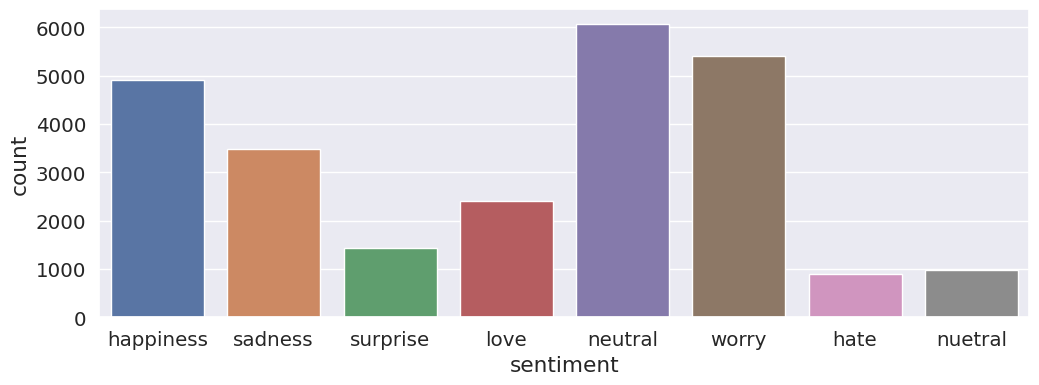

In [81]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,4))
sns.countplot(x='sentiment', data=df_train);

In [82]:
df_train.isnull().sum()

sentiment    0
content      0
dtype: int64

In [83]:
df_train.duplicated().sum()

43

In [84]:
index = df_train[df_train.duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [85]:
df_train[df_train['content'].duplicated() == True]

,sentiment,content
2419,worry,at hannah montana set.... im missing tennessee...
3869,neutral,@ThinkReferrals oh man I'm jealous! just got it?
5045,love,Happy Mother's Day!
5792,neutral,Work...
6105,happiness,Happy Mothers Day
6110,love,I just received a mothers day card from my lov...
6301,love,Good Morning
6727,sadness,Happy Mothers Day
7089,love,FREE UNLIMITED RINGTONES!!! - http://tinyurl.c...
7207,happiness,FREE UNLIMITED RINGTONES!!! - http://tinyurl.c...


In [86]:
index = df_train[df_train['content'].duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [87]:
df_train.duplicated().sum()

0

In [88]:
df_train[df_train['content'].duplicated() == True]

,sentiment,content


In [89]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

nltk.download('stopwords') 
stop_words = set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /home/jay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
temp =df_train.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['content'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

stop_words
2     3510
3     3449
4     3139
1     2977
5     2711
6     2399
0     2289
7     1778
8     1307
9      855
10     580
11     271
12     150
13      77
14      24
15       3
16       1
Name: count, dtype: int64

### Test set

In [91]:
df_test.sentiment.value_counts()

sentiment
neutral      1896
worry        1692
happiness    1586
sadness      1057
love          780
surprise      399
nuetral       307
hate          283
Name: count, dtype: int64

In [92]:
df_test.sentiment.value_counts() / df_train.shape[0] *100

sentiment
neutral      7.429467
worry        6.630094
happiness    6.214734
sadness      4.141850
love         3.056426
surprise     1.563480
nuetral      1.202978
hate         1.108934
Name: count, dtype: float64

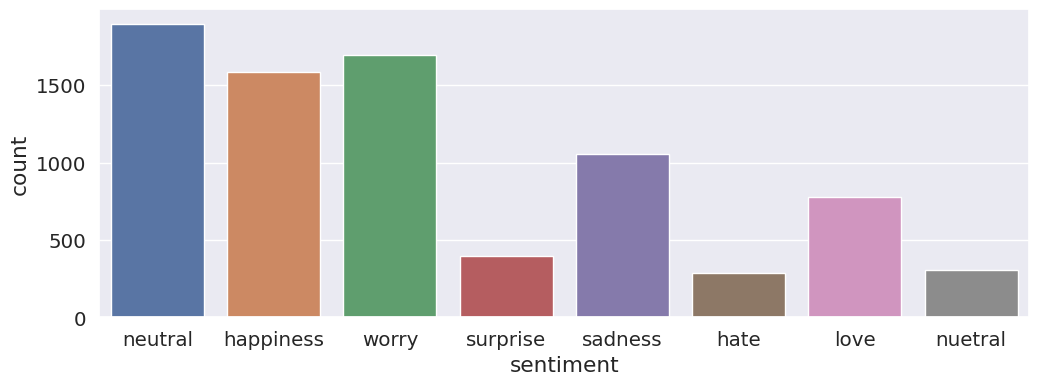

In [93]:
plt.figure(figsize=(12,4))
sns.countplot(x='sentiment', data=df_test);


In [94]:
df_test.isnull().sum()

sentiment    0
content      0
dtype: int64

In [95]:
df_test.duplicated().sum()

13

In [96]:
df_test[df_test['content'].duplicated() == True]

,sentiment,content
38508,love,Happy Mothers Day
33496,love,I just received a mothers day card from my lov...
35609,love,I just received a mothers day card from my lov...
38311,love,happy mother's day
39859,love,Happy Mothers Day
32862,neutral,Just cleaned mii scrolly ball!
24562,happiness,Happy Star Wars Day
37312,love,happy mother's day
13491,worry,Headache
35051,love,I just received a mothers day card from my lov...


In [97]:
temp =df_test.copy()
temp['stop_words'] = temp['content'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

stop_words
2     1085
3     1077
4      991
1      947
5      865
0      745
6      711
7      560
8      399
9      276
10     194
11      84
12      40
13      22
17       2
15       1
14       1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

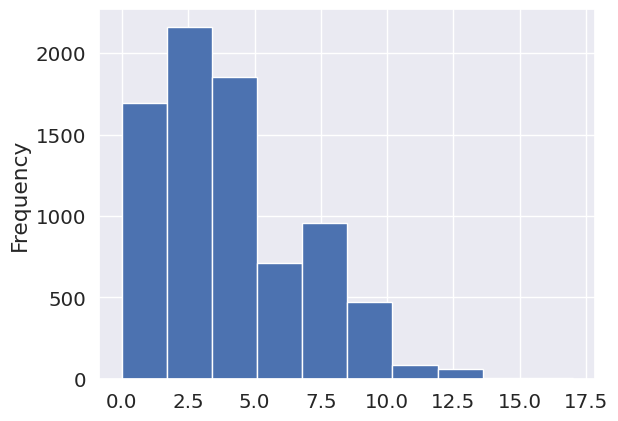

In [98]:
sns.set(font_scale=1.3)
temp['stop_words'].plot(kind= 'hist')

### Validation set

In [99]:
df_val.sentiment.value_counts()

sentiment
neutral      1500
worry        1365
happiness    1247
sadness       798
love          650
surprise      353
hate          247
nuetral       240
Name: count, dtype: int64

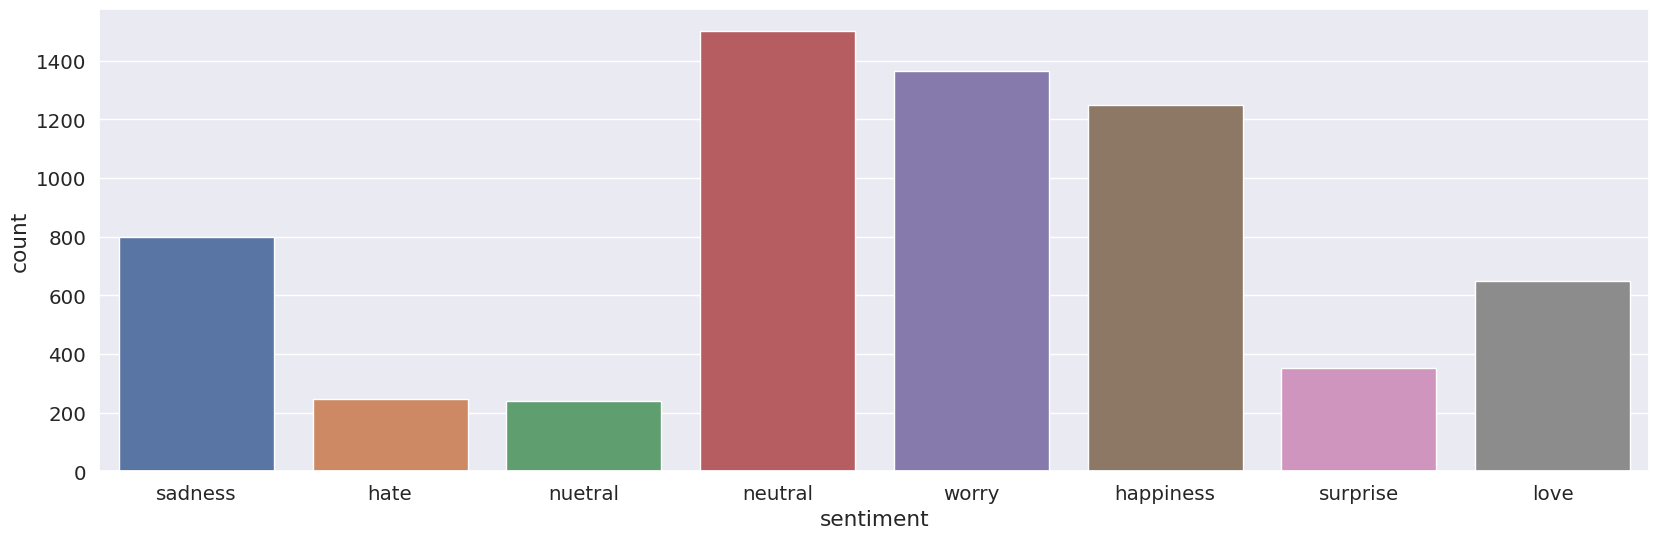

In [100]:
plt.figure(figsize=(20,6))
sns.countplot(x='sentiment', data=df_val);

In [101]:
df_val.isnull().sum()

sentiment    0
content      0
dtype: int64

In [102]:
df_val.duplicated().sum()

2

In [103]:
df_val[df_val['content'].duplicated() == True]

,sentiment,content
38557,love,http://snipurl.com/hq0n1 Just printed my mom a...
33401,nuetral,FREE UNLIMITED RINGTONES!!! - http://tinyurl.c...
33457,love,happy mother's day
33693,love,I just received a mothers day card from my lov...
32734,happiness,happy mother's day!
37777,happiness,@andyclemmensen have you seen the game on the ...


In [104]:
index = df_val[df_val['content'].duplicated() == True].index
df_val.drop(index, axis = 0, inplace = True)
df_val.reset_index(inplace=True, drop = True)

In [105]:
temp =df_val.copy()
temp['stop_words'] = temp['sentiment'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

stop_words
0    6394
Name: count, dtype: int64

### Comparing sets

In [106]:
def dataframe_difference(df1, df2, which=None):
    """Find rows which are different between two DataFrames."""
    
    # Combine the two DataFrames using a merge operation, with the
    # indicator parameter set to True. This adds a column called _merge
    # to the resulting DataFrame, which indicates the source of each row.
    comparison_df = df1.merge(
        df2,
        indicator=True,
        how='outer'
    )
    
    # Filter the merged DataFrame based on the value of _merge. If which
    # is not specified, return all rows where _merge is not 'both'.
    # Otherwise, return all rows where _merge has the specified value
    if which is None:
        diff_df = comparison_df[comparison_df['_merge'] != 'both']
    else:
        diff_df = comparison_df[comparison_df['_merge'] == which]
        
    # Return the filtered DataFrame
    return diff_df

In [107]:
dataframe_difference(df_train, df_test, which='both')

,sentiment,content,_merge
234,neutral,about to go to sleep,both
558,neutral,@smashingpumpkin http://twitpic.com/67h72 -,both
1456,neutral,Good Morning,both
3034,love,Happy Mothers Day,both
3035,love,Happy Mothers Day,both
3036,love,Happy Mothers Day,both
3037,love,Happy Mothers Day,both
4362,neutral,FREE UNLIMITED RINGTONES!!! - http://tinyurl.c...,both
5301,love,Happy Mothers Day!!,both
5318,love,happy mothers day mum,both


In [108]:
dataframe_difference(df_train, df_val, which='both')

,sentiment,content,_merge
2139,neutral,nothing,both
3034,love,Happy Mothers Day,both
4359,neutral,FREE UNLIMITED RINGTONES!!! - http://tinyurl.c...,both
5761,happiness,May the 4th be with you,both
12876,love,Happy Mothers Day. Havent got mom a present ye...,both
14514,sadness,I miss you,both
19290,worry,My back hurts,both
19513,sadness,My tummy hurts...,both
23411,worry,My throat hurts,both


In [109]:
dataframe_difference(df_test, df_val, which='both')

,sentiment,content,_merge
19,love,@RealHughJackman Wolverine is awesome.. love i...,both
239,love,I just received a mothers day card from my lov...,both
240,love,I just received a mothers day card from my lov...,both
241,love,I just received a mothers day card from my lov...,both
242,love,I just received a mothers day card from my lov...,both
1940,love,happy mother's day,both
1941,love,happy mother's day,both
1942,love,happy mother's day,both
2151,love,Happy Mothers Day,both
2152,love,Happy Mothers Day,both


## Cleaning 

In [110]:
nltk.download('wordnet')
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]
    
    return " " .join(text)

[nltk_data] Downloading package wordnet to /home/jay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [111]:
def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

In [112]:
def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

In [113]:
def lower_case(text):
    
    text = text.split()

    text=[y.lower() for y in text]
    
    return " " .join(text)

In [114]:
import re
def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

In [115]:
def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [116]:
def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan

In [117]:
def normalize_text(df):
    df.content=df.content.apply(lambda text : lower_case(text))
    df.content=df.content.apply(lambda text : remove_stop_words(text))
    df.content=df.content.apply(lambda text : Removing_numbers(text))
    df.content=df.content.apply(lambda text : Removing_punctuations(text))
    df.content=df.content.apply(lambda text : Removing_urls(text))
    df.content=df.content.apply(lambda text : lemmatization(text))
    return df

In [118]:
def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence

In [119]:
normalized_sentence("Extremely busy weekend. So much work to do. C")

'extremely busy weekend much work do c'

In [120]:
df_train= normalize_text(df_train)
df_test= normalize_text(df_test)
df_val= normalize_text(df_val)

In [121]:
df_train

,sentiment,content
0,happiness,incomediary sure easier login every day make p...
1,happiness,seat nice place go
2,sadness,wasnt workin hour id gettin ratarsed point cou...
3,happiness,kevjaffray too cloudy day madrid typical sprin...
4,surprise,paperclippe ipod headphone gone kaput wanted b...
...,...,...
25515,neutral,antonisha man people hard reach i ve stalking h r
25516,worry,remind get amp take pic blooming clematis wind...
25517,sadness,sometimes wish hair back
25518,neutral,kfc


# MODEL

* 0. Baseline ML model with TF-IDF
* 1. RNN 

In [122]:
x_train = df_train['content'].values
y_train = df_train['sentiment'].values

x_test = df_test['content'].values
y_test = df_test['sentiment'].values

x_val = df_val['content'].values
y_val = df_val['sentiment'].values

In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [124]:
y_train

array([0, 0, 5, ..., 5, 3, 3])

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

def train_model(model, data, targets):
    text_clf = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', model)])
    text_clf.fit(data, targets)
    return text_clf

In [126]:
from sklearn.ensemble import RandomForestClassifier
model_0 = train_model(RandomForestClassifier(random_state = 0), x_train, y_train)

In [127]:
model_0.predict(['i want to kill my self'])

array([7])

In [128]:
y_pred=model_0.predict(x_test)

In [129]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
model_0_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', model_0_accuracy,'\n')

Accuracy:  0.373 



In [130]:
def get_F1(trained_model,X,y):
    predicted=trained_model.predict(X)
    f1=f1_score(y,predicted, average=None)
    return f1

In [131]:
from sklearn.metrics import f1_score
f1_Score = get_F1(model_0,x_test,y_test)
pd.DataFrame(f1_Score, index=df_train.sentiment.unique(), columns=['F1 score'])

,F1 score
happiness,0.405538
sadness,0.291866
surprise,0.424460
love,0.448535
neutral,0.035928
worry,0.259061
hate,0.045662
nuetral,0.350509


In [132]:
from sklearn.naive_bayes import MultinomialNB

model_0 = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

In [133]:
model_0.fit(x_train,y_train)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [134]:
model_0.score(x_train,y_train)

0.569435736677116

## Vectorization